In [341]:
import soundfile as sf
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft, signal
from scipy.signal import filtfilt, butter

## Estrazione dei dati

In [342]:
# leggiamo i contenuti di un file audio(.wav)
audio, samplerate = sf.read("diapason.wav")

#canale 1
ch1 = audio[:,0]

#canale 2
ch2 = audio[:,1]

#### Waveform del file audio 

Text(0, 0.5, 'Ampiezza')

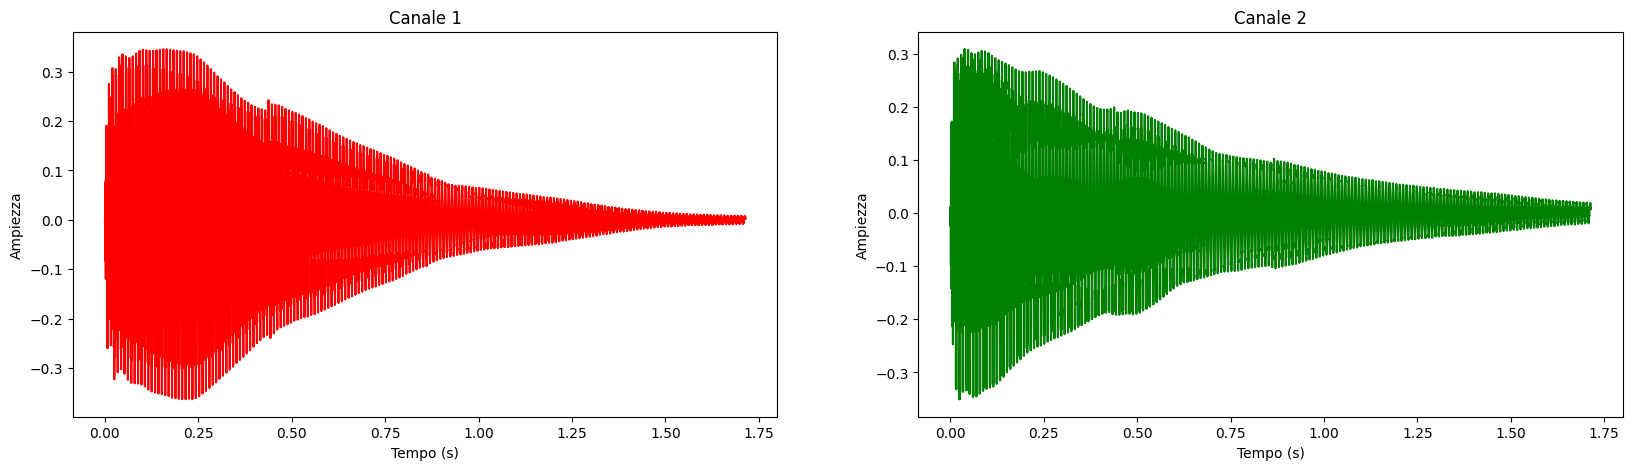

In [343]:
#per avere i secondi(asse x)
Time = np.linspace(0, len(ch1)/ samplerate, num=len(ch1))

fig, ax = plt.subplots(ncols=2, figsize=(20, 5))

#plot canale 1
ax[0].plot(Time, ch1, "r")
ax[0].set_title("Canale 1")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Ampiezza")

#plot canale 2
ax[1].plot(Time, ch2, "g")
ax[1].set_title("Canale 2")
ax[1].set_xlabel("Tempo (s)")
ax[1].set_ylabel("Ampiezza")

### FFT(fast fourier transform) 

per comodità prenderemo in esame solo il primo canale, ora calcoliamo la trasformata di fourier

In [344]:
#transformata di fourier
ch1_fft = fft.fft(ch1)

### Spettro di potenza

calcolo dello spettro di potenza, e successiva conversione in decibel

In [345]:
# calcolo spettro di potenza
ch1_pwr_spectrum = np.abs(ch1_fft[:len(ch1)//2])**2
# conversione in decibel
power_spectrum_db = 10 * np.log10(ch1_pwr_spectrum) 

### Plot parte reale e immaginaria

Text(0, 0.5, 'Ampiezza')

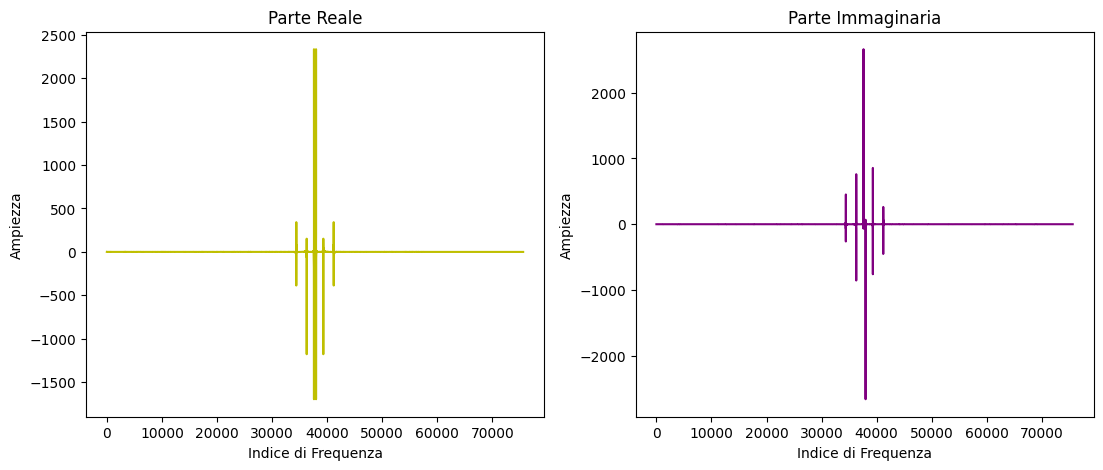

In [346]:
#creazione layout plot
fig, ax = plt.subplots(ncols=2, figsize=(13, 5))

#parte reale
ax[0].plot(np.fft.fftshift(np.real(ch1_fft)), "y")
ax[0].set_title("Parte Reale")
ax[0].set_xlabel("Indice di Frequenza")
ax[0].set_ylabel("Ampiezza")

#parte immaginaria
ax[1].plot(np.fft.fftshift(np.imag(ch1_fft)), "purple")
ax[1].set_title("Parte Immaginaria")
ax[1].set_xlabel("Indice di Frequenza")
ax[1].set_ylabel("Ampiezza")

### Plot spettro di potenza

Text(0, 0.5, 'Potenza (Db)')

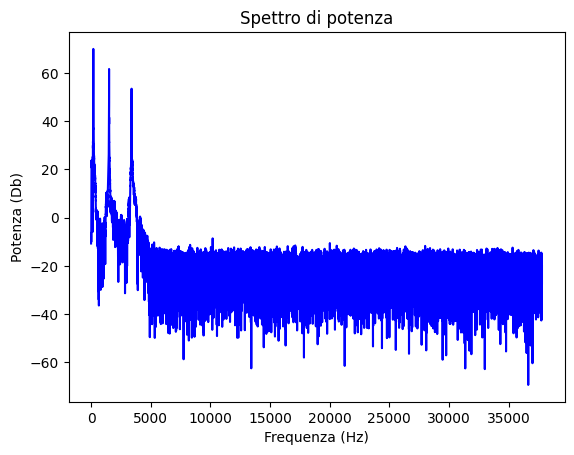

In [347]:
plt.plot(power_spectrum_db, "blue")
plt.title("Spettro di potenza")
plt.xlabel("Frequenza (Hz)")
plt.ylabel("Potenza (Db)")

### Cerchiamo i picchi 

cerchiamo i picchi 

[-10.74173576  -9.71732298  -8.16389629 ... -19.7135794  -27.62542881
 -20.14483833]


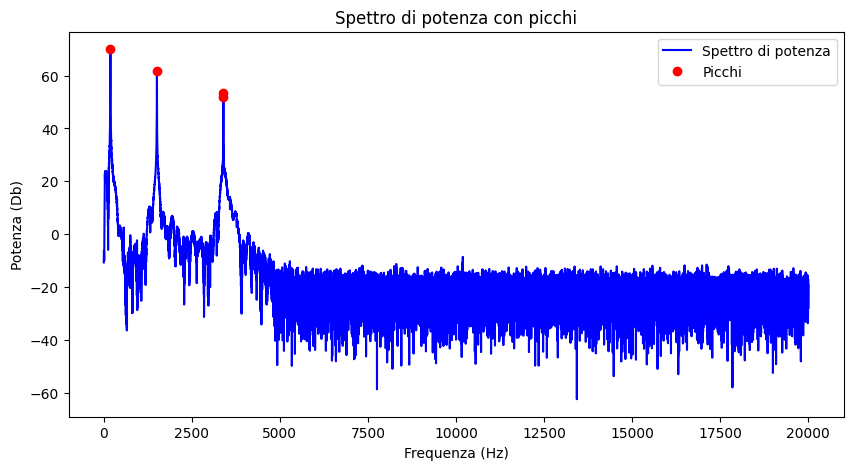

In [348]:
#soglia dei decibel(qualque cosa sopra il valore indicato verra contrassegnato)
height= 50

#limite hz
limit = 20000

#cerca i picchi con i parametri scelti
peaks, _ = signal.find_peaks(power_spectrum_db, height=height)

print(power_spectrum_db)

plt.figure(figsize=(10, 5))
plt.plot(power_spectrum_db[:limit], "blue", label="Spettro di potenza")
plt.plot(peaks, power_spectrum_db[peaks],"o" , label="Picchi",color="red")
plt.title("Spettro di potenza con picchi")
plt.xlabel("Frequenza (Hz)")
plt.ylabel("Potenza (Db)")
plt.legend()


### Larghezza dei picchi

La larghezza di un picco è la distanza tra i punti a metà altezza del picco, misurata in unità di frequenza (Hz).

(array([ 70.90097895, 191.31884438, 300.21479172,   0.67965733]), array([29.61913272, 12.59306596, 11.04834389, 51.52901375]), array([ 159.20040718, 1409.21438549, 3282.29904206, 3397.5       ]), array([ 230.10138612, 1600.53322986, 3582.51383378, 3398.17965733]))


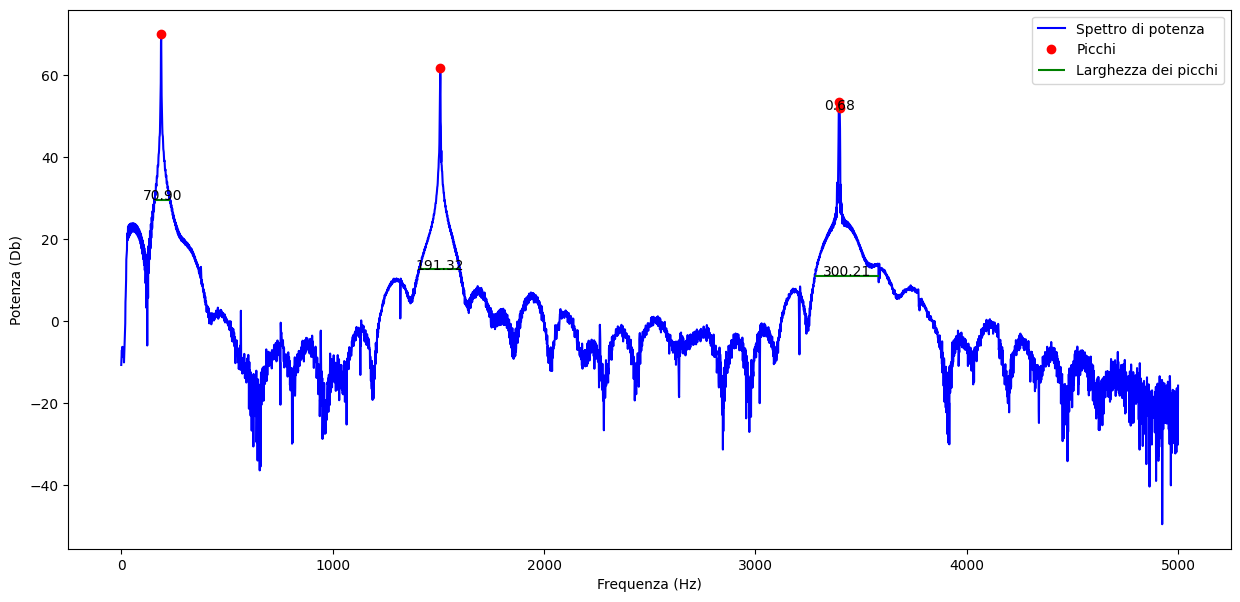

In [349]:
width = signal.peak_widths(power_spectrum_db, peaks)

plt.figure(figsize=(15, 7))
plt.plot(power_spectrum_db[:5000], color="blue", label="Spettro di potenza")
plt.plot(peaks, power_spectrum_db[peaks],"o" , label="Picchi",color="red")
plt.hlines(*width[1:], colors="green", label="Larghezza dei picchi")

#per indicare la "larghezza" di ogni picco sul grafico
for i in range(len(peaks)):
    plt.text((width[2][i] + width[3][i]) / 2, width[1][i], f'{width[0][i]:.2f}', color="black", ha="center")
plt.legend()
plt.xlabel("Frequenza (Hz)")
plt.ylabel("Potenza (Db)")
print(width)
#composizione dell'output di peak_widths:
# 0 = Larghezza dei picchi, 1 = altezza(y) dove i picchi sono stati valutati, 2 = inizio picco, 3 = fine picco

### Creazione di un filtro passa alto

un filtro passa alto permette solo a frequenze sopra ad un certa soglia di "passare" (l'opposto di quello che accade sotto)

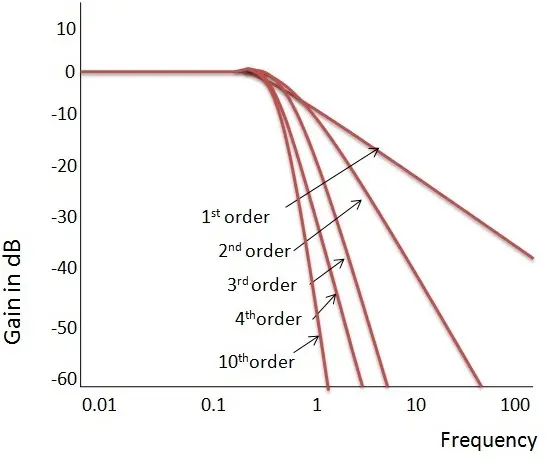

In [350]:
# parametri filtro
freq = 500
order = 4
fs = samplerate

# nyquist
nyq = 0.5*fs

# uso nyquist per normalizzare i valori tra 0 e 1
normalized_freq = freq/nyq

# creazione del filtro
a, b = butter(order, normalized_freq, btype='highpass')

#### Applicazione del filtro

In [351]:
# applico il filtro
onda_filtrata = filtfilt(a, b, ch1)

Text(0, 0.5, 'Ampiezza')

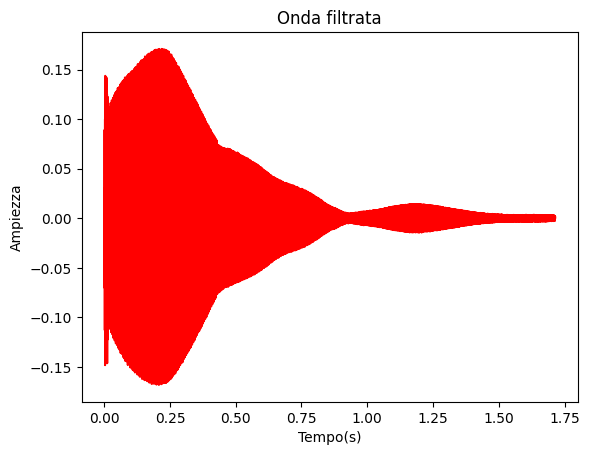

In [352]:
# plot del onda filtro
plt.plot(Time, onda_filtrata, color="red")
plt.title("Onda filtrata")
plt.xlabel("Tempo(s)")
plt.ylabel("Ampiezza")

In [353]:
# output nuovo file audio filtrato
sf.write('diapason_lowpass.wav', onda_filtrata, fs)

#### Plot nuovo spettro di potenza

In [354]:
pwr_onda_filtrata = np.abs(fft.fft(onda_filtrata)[:len(ch1)//2])**2
pwr_onda_filtrata_db = 10 * np.log10(pwr_onda_filtrata) 

Text(0, 0.5, 'Potenza (Db)')

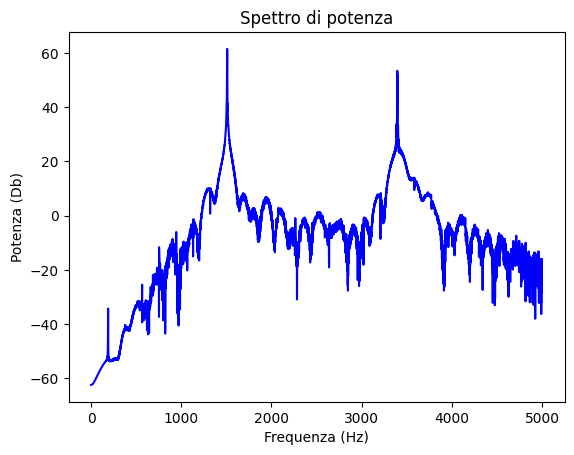

In [355]:
plt.plot(pwr_onda_filtrata_db[:5000], "blue")
plt.title("Spettro di potenza")
plt.xlabel("Frequenza (Hz)")
plt.ylabel("Potenza (Db)")

#### confronto segnale non filtrato e segnale filtrato

Text(0, 0.5, 'Ampiezza')

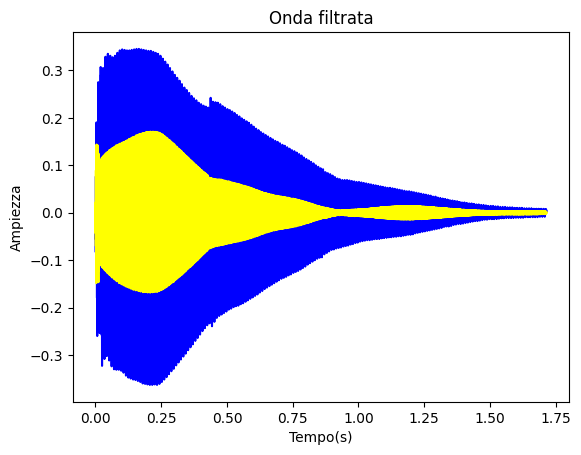

In [356]:
# plot del onda filtro
plt.plot(Time, ch1, color="blue")
plt.plot(Time, onda_filtrata, color="yellow")
plt.title("Onda filtrata")
plt.xlabel("Tempo(s)")
plt.ylabel("Ampiezza")